<a href="https://colab.research.google.com/github/pandradec/ML-practicas/blob/main/ML_20231212_(Reg_Log_Galilea).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA

In [ ]:
# Importar librerias

# Manipulacion de datos
import pandas as pd

# Dataset
from sklearn.datasets import load_breast_cancer

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Separacion
from sklearn.model_selection import train_test_split

# Preprocesamiento
from sklearn.preprocessing import StandardScaler

# Seleccion de caracteristicas
from sklearn.feature_selection import SelectKBest, f_classif, SelectPercentile, VarianceThreshold

# Metricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [ ]:
df_crm = pd.read_excel('/content/CRM.xlsx')

In [ ]:
df_crm.columns

Index(['Proyecto', 'Asesor', 'Id Opt.', 'Id Cont.', 'DNI', 'Ap. Paterno',
       'Ap. Materno', 'Nombre', 'Sexo', 'F. Nac.', 'Estado Civil', 'N° Hijos',
       'Telefono', 'Correo', 'Nacionalidad', 'Profesion', 'Tipo Trabajo',
       'Sueldo', 'Departamento', 'Provincia', 'Distrito', 'Origen', 'Atencion',
       'Estado', 'Tipo de casa', 'Motivacion de compra', 'Banco',
       'Tipo de Financiamiento', 'Mes', 'F. Flujo', 'F. Contacto',
       'F. Seguimiento', 'Mes Separación', 'F. Separacion', 'F. Ya no va',
       'Motivo Ya No Va', 'Ult. Actividad', 'Estado anterior',
       'Motivo Sepracion', 'Sub-Origen', 'Usuario-Registro', 'Contrato',
       'Comentario', 'Ingreso Adicional', 'Motivo no compra',
       'Sector Trabajador', 'Estado Civil (estadistica)'],
      dtype='object')

In [ ]:
# Seleccion de caracteristicas
features = ['Proyecto', 'Sexo', 'Estado Civil', 'Nacionalidad', 'Profesion',
       'Sueldo', 'Origen', 'Atencion', 'Contrato']

df = df_crm[features]

In [ ]:
df['Nacionalidad'].value_counts()

PERUANA        16062
BOLIVIANA         24
VENEZUELA         23
COLOMBIANA         8
ECUATORIANA        2
PARAGUAYA          1
BRASILEÑA          1
Name: Nacionalidad, dtype: int64

In [ ]:
# Nos quedamos solo con Nacionalidad = Peruana
df = df[df['Nacionalidad']=='PERUANA']
df =  df.drop(columns=['Nacionalidad'])

In [ ]:
# Revisar valores nulos
df.isnull().sum()

Proyecto            0
Sexo                1
Estado Civil      306
Profesion         556
Sueldo              0
Origen              0
Atencion            0
Contrato        15267
dtype: int64

In [ ]:
# Eliminar filas vacias de 'Sexo', 'Estado Civil' y 'Profesion'
columnas_a_limpiar = ['Sexo', 'Estado Civil', 'Profesion']
df.dropna(subset=columnas_a_limpiar, inplace=True)

In [ ]:
df['Proyecto'].value_counts()

SDPII     2611
LAMBII    2525
SCHII     2394
VAL       2360
MTVII     2324
PDSII     1503
ACHII     1310
LOM        315
MTVD       141
SDH         13
LAMB         5
SDP          3
SLDII        1
Name: Proyecto, dtype: int64

In [ ]:
# Ahora eliminamos los proyectos no vigentes: SDH, LAMB, SDP y SLD II
# Y eliminar proyectos con poca data: MTVD y LOM
proyectos_eliminar = ['SDH','LAMB','SDP','SLDII','MTVD','LOM']
df.drop(df[df['Proyecto'].isin(proyectos_eliminar)].index, inplace=True)


In [ ]:
df.shape

(15027, 8)

In [ ]:
# Supongamos que df es tu DataFrame
# Asegúrate de tener variables dummy para las variables categóricas
df = pd.get_dummies(df, columns=['Proyecto', 'Sexo', 'Estado Civil', 'Profesion',
       'Origen', 'Atencion'], drop_first=True)


In [ ]:
df.shape

(15027, 90)

In [ ]:
df.head()

,Sueldo,Contrato,Proyecto_LAMBII,Proyecto_MTVII,Proyecto_PDSII,Proyecto_SCHII,Proyecto_SDPII,Proyecto_VAL,Sexo_Masculino,Estado Civil_Conviviente,...,Origen_VISITA CLIENTES,Origen_WEB GALILEA,Origen_WEB INTERBANK,Atencion_CASETA/CASA PILOTO,Atencion_FERIA/EVENTO,Atencion_OFICINA,Atencion_REDES DIGITAL,Atencion_VIA TELEFONICA,Atencion_VIA TELEFONICA DIGITAL,Atencion_WEB DIGITAL
0,5500,NaN,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2500,NaN,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,4000,NaN,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,4500,NaN,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,3000,NaN,1,0,0,0,0,0,1,1,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
def cat_contrato(x):
  if x >0:
    return 1
  else:
    return 0

In [ ]:
df['Contrato'] = df['Contrato'].apply(cat_contrato)

In [ ]:
df.describe()

,Sueldo,Contrato,Proyecto_LAMBII,Proyecto_MTVII,Proyecto_PDSII,Proyecto_SCHII,Proyecto_SDPII,Proyecto_VAL,Sexo_Masculino,Estado Civil_Conviviente,...,Origen_VISITA CLIENTES,Origen_WEB GALILEA,Origen_WEB INTERBANK,Atencion_CASETA/CASA PILOTO,Atencion_FERIA/EVENTO,Atencion_OFICINA,Atencion_REDES DIGITAL,Atencion_VIA TELEFONICA,Atencion_VIA TELEFONICA DIGITAL,Atencion_WEB DIGITAL
count,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,...,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000,15027.000000
mean,2883.134425,0.052173,0.168031,0.154655,0.100020,0.159313,0.173754,0.157051,0.488521,0.020962,...,0.001597,0.243894,0.000067,0.153856,0.011912,0.118320,0.332668,0.109935,0.119252,0.141079
std,2644.684404,0.222383,0.373906,0.361587,0.300037,0.365980,0.378910,0.363861,0.499885,0.143263,...,0.039933,0.429444,0.008158,0.360823,0.108493,0.322998,0.471184,0.312820,0.324096,0.348115
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,200000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Visualizacion

<ipython-input-18-c9f959205c1f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_crm.corr(), annot=True)


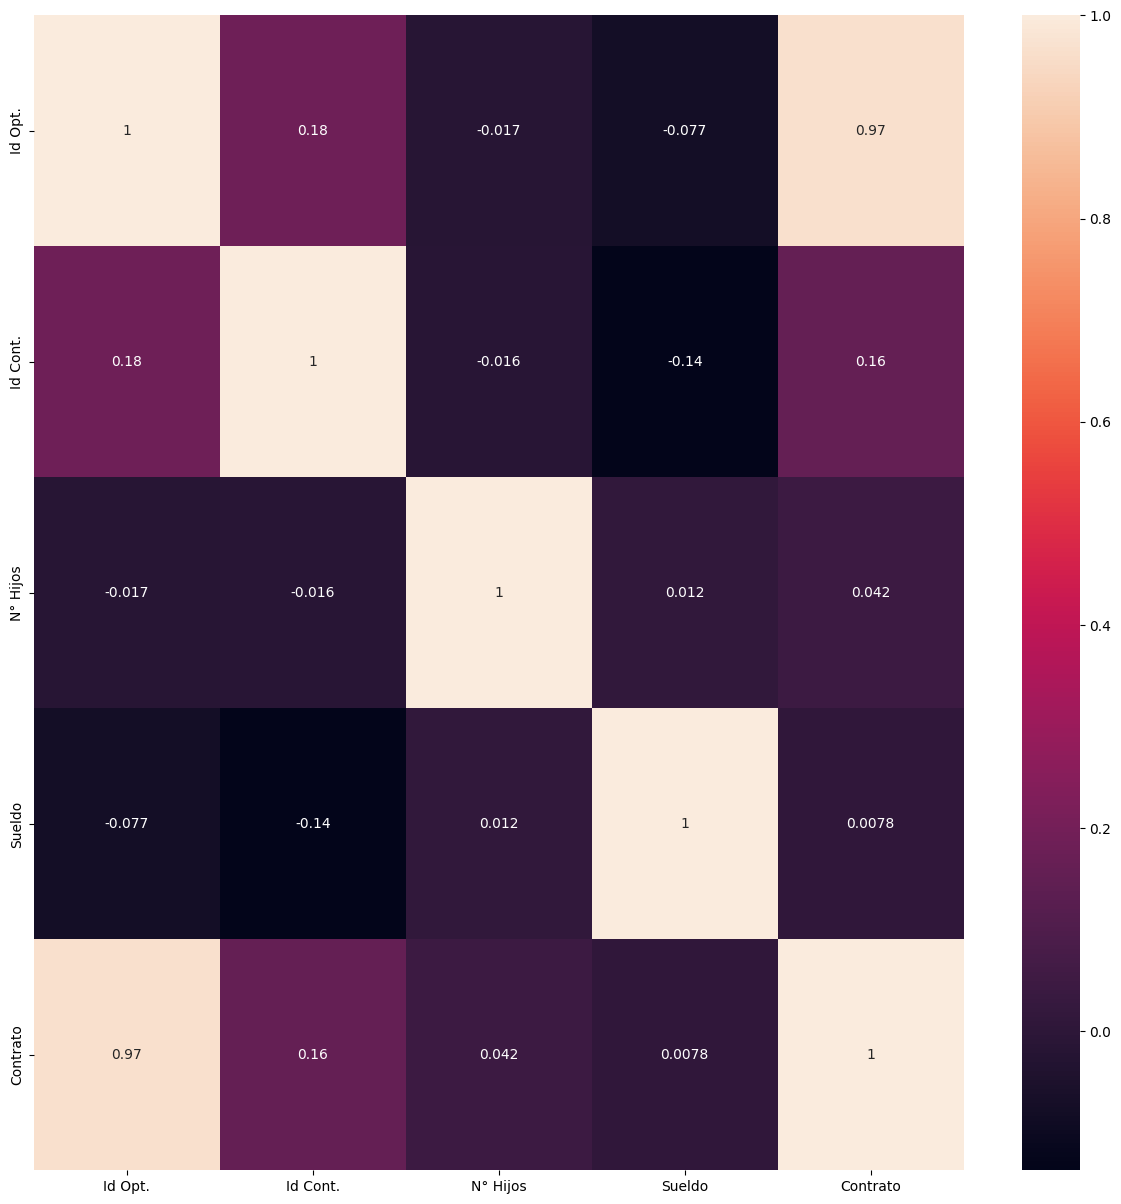

In [ ]:
# Mapa de calor: analisis de correlacion
plt.figure(figsize=(15,15))
sns.heatmap(df_crm.corr(), annot=True)
plt.show()

## Modelado

In [ ]:
x = df.drop(['Contrato'], axis=1 )
y = df['Contrato']

In [ ]:
# Dividir los datos
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [ ]:
len(x_train)

10518

In [ ]:
len(x)

15027

In [ ]:
len(x_test)

4509

In [ ]:
x.columns

Index(['Sueldo', 'Proyecto_LAMBII', 'Proyecto_MTVII', 'Proyecto_PDSII',
       'Proyecto_SCHII', 'Proyecto_SDPII', 'Proyecto_VAL', 'Sexo_Masculino',
       'Estado Civil_Conviviente', 'Estado Civil_Divorciado',
       'Estado Civil_Soltero', 'Estado Civil_Viudo', 'Profesion_AFP',
       'Profesion_AGROINDUSTRIAL', 'Profesion_AGRONOMIA',
       'Profesion_ARQUITECTURA', 'Profesion_AUTOMOTRÍZ',
       'Profesion_BANCA Y FINANZAS', 'Profesion_BANCO Y CAJAS',
       'Profesion_BELLEZA', 'Profesion_COMERCIANTE', 'Profesion_COMPUTACION',
       'Profesion_CONSTRUCCION', 'Profesion_CONSULTORÍA',
       'Profesion_CONSUMO MASIVO', 'Profesion_CONTABILIDAD',
       'Profesion_DERECHO', 'Profesion_ECONOMIA', 'Profesion_EDUCACION',
       'Profesion_EDUCACIÓN', 'Profesion_EJERCITO', 'Profesion_ENFERMERIA',
       'Profesion_FAP', 'Profesion_FUERZAS ARMADAS', 'Profesion_GASTRONOMIA',
       'Profesion_HOTELERÍA Y TURISMO', 'Profesion_INDUSTRIAL',
       'Profesion_INGENIERIA', 'Profesion_INMOBILIAR

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Feature selection/ Seleccion de caracteristicas

In [ ]:
# Metodo1: SelectKBest con F-test ANOVA
selector_kbest = SelectKBest(f_classif, k=10)
x_train_kbest = selector_kbest.fit_transform(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [62 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
# Metodo2: SelectPercentile con F-test ANOVA
selector_percentile = SelectPercentile(f_classif, percentile=50)
x_train_percentile = selector_percentile.fit_transform(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [62 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
x_train_percentile.shape

(10518, 44)

In [ ]:
# Metodo3: VarianceThreshold
selector_variance = VarianceThreshold()
x_train_variance = selector_variance.fit_transform(x_train)

In [ ]:
# Comparar la cantidad de características seleccionadas por cada método
num_features_kbest = x_train_kbest.shape[1]
num_features_percentile = x_train_percentile.shape[1]
num_features_variance = x_train_variance.shape[1]

print(f"Número de características seleccionadas por SelectKBest: {num_features_kbest}")
print(f"Número de características seleccionadas por SelectPercentile: {num_features_percentile}")
print(f"Número de características seleccionadas por VarianceThreshold: {num_features_variance}")

Número de características seleccionadas por SelectKBest: 10
Número de características seleccionadas por SelectPercentile: 44
Número de características seleccionadas por VarianceThreshold: 87


## Entrenamiento de modelos

In [ ]:
# Metodos de seleccion de caracteristicas
selectores = {
        'SelectKBest': SelectKBest(f_classif, k=10),
        'SelectPercentile': SelectPercentile(f_classif, percentile=50),
        'VarianceThreshold': VarianceThreshold()
}

In [ ]:
selectores

{'SelectKBest': SelectKBest(),
 'SelectPercentile': SelectPercentile(percentile=50),
 'VarianceThreshold': VarianceThreshold()}

In [ ]:
# Inicializar o instanciar modelos
modelos = {
    "Regresión Logística": LogisticRegression(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Bosque Aleatorio": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

In [ ]:
# DataFrame para almacenar métricas
df_metrica = pd.DataFrame(columns=["selector", 'modelo', "precision", "exactitud", "recall", "puntuacion_f1"])
df_metrica

,selector,modelo,precision,exactitud,recall,puntuacion_f1


In [ ]:
# Entrenamiento y evaluacion
for selector_name, selector in selectores.items():
  x_train_seleccionadas = selector.fit_transform(x_train, y_train)
  x_test_seleccionadas = selector.transform(x_test)

  for model_name, model in modelos.items():
    model.fit(x_train_seleccionadas, y_train)
    y_pred = model.predict(x_test_seleccionadas)

    # Calcular y guardar metricas
    metricas_actuales = pd.DataFrame({
        'selector': [selector_name],
        'modelo': [model_name],
        'precision': [accuracy_score(y_test, y_pred)],
        'exactitud': [precision_score(y_test, y_pred)],
        'recall': [recall_score(y_test, y_pred)],
        'puntuacion_f1': [f1_score(y_test, y_pred)]
    })

    df_metrica = pd.concat([df_metrica, metricas_actuales], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [62 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [62 74] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: Runti

In [ ]:
df_metrica

,selector,modelo,precision,exactitud,recall,puntuacion_f1
0,SelectKBest,Regresión Logística,0.950543,0.000000,0.000000,0.000000
1,SelectKBest,SVM,0.950765,0.000000,0.000000,0.000000
2,SelectKBest,Naive Bayes,0.842094,0.135417,0.409910,0.203579
3,SelectKBest,Árbol de Decisión,0.940563,0.116667,0.031532,0.049645
4,SelectKBest,Bosque Aleatorio,0.940342,0.114754,0.031532,0.049470
5,SelectKBest,AdaBoost,0.950100,0.200000,0.004505,0.008811
6,SelectPercentile,Regresión Logística,0.950987,0.600000,0.013514,0.026432
7,SelectPercentile,SVM,0.950765,0.000000,0.000000,0.000000
8,SelectPercentile,Naive Bayes,0.082502,0.049275,0.963964,0.093757
9,SelectPercentile,Árbol de Decisión,0.922156,0.158730,0.135135,0.145985


In [ ]:
df_recall = df_metrica.sort_values(by='recall', ascending=False)
df_recall

,selector,modelo,precision,exactitud,recall,puntuacion_f1
14,VarianceThreshold,Naive Bayes,0.077179,0.050650,1.000000,0.096417
8,SelectPercentile,Naive Bayes,0.082502,0.049275,0.963964,0.093757
2,SelectKBest,Naive Bayes,0.842094,0.135417,0.409910,0.203579
15,VarianceThreshold,Árbol de Decisión,0.921934,0.181373,0.166667,0.173709
9,SelectPercentile,Árbol de Decisión,0.922156,0.158730,0.135135,0.145985
10,SelectPercentile,Bosque Aleatorio,0.938346,0.150000,0.054054,0.079470
16,VarianceThreshold,Bosque Aleatorio,0.942338,0.193548,0.054054,0.084507
3,SelectKBest,Árbol de Decisión,0.940563,0.116667,0.031532,0.049645
4,SelectKBest,Bosque Aleatorio,0.940342,0.114754,0.031532,0.049470
11,SelectPercentile,AdaBoost,0.950543,0.461538,0.027027,0.051064
